# Visualization with matplotlib

## Lecture Objectives

  - Create simple graphs in Python using `matplotlib`

## Motivation

  - So far we've only been using R in class, but Python is also a very popular language for data science.
  - As we start using Python more and more, you may not always want to switch back and forth between the two.
  - In this lecture, you'll be introduced to the main plotting library in Python: `matplotlib`.

## Disclaimer

  - I personally prefer `ggplot2` to `matplotlib`.
    + I find it more flexible, more powerful, and the syntax makes more sense (to me!).
  - Therefore, when I create data visualization for a paper, I almost always use `ggplot2`.
    + E.g. Do computation in Python, save results as CSV, import in R and plot.
  - But I use `matplotlib` for quick visualization and sanity checks.

## Histograms

  - We will start where we started with ggplot: the histogram.
  - The basic function is `hist` in `matplotlib.pyplot`.
  - We will start by generating random numbers using Numpy. We will see later how to import data.

(array([ 20.,  54., 113., 155., 207., 215., 121.,  82.,  22.,  11.]),
 array([-2.64527183, -2.0790192 , -1.51276656, -0.94651392, -0.38026128,
         0.18599135,  0.75224399,  1.31849663,  1.88474927,  2.4510019 ,
         3.01725454]),
 <BarContainer object of 10 artists>)

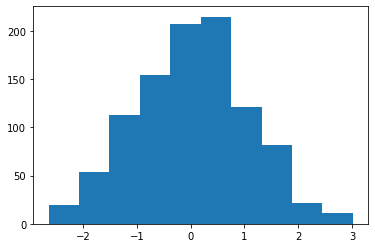

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Generate 1000 random numbers
data = np.random.randn(1000)
plt.hist(data)

The `hist` function has many parameters you can use to customize your plots.

(array([0.02648994, 0.05827787, 0.02119195, 0.07946983, 0.05827787,
        0.14834368, 0.18013161, 0.15893966, 0.25960144, 0.29668736,
        0.25430345, 0.27019742, 0.34436926, 0.4185411 , 0.33377328,
        0.36556121, 0.38675317, 0.38675317, 0.28079339, 0.17483362,
        0.1854296 , 0.21191954, 0.11655575, 0.10595977, 0.04238391,
        0.03708592, 0.03708592, 0.03708592, 0.01059598, 0.01059598]),
 array([-2.64527183e+00, -2.45652095e+00, -2.26777007e+00, -2.07901920e+00,
        -1.89026832e+00, -1.70151744e+00, -1.51276656e+00, -1.32401568e+00,
        -1.13526480e+00, -9.46513920e-01, -7.57763041e-01, -5.69012162e-01,
        -3.80261283e-01, -1.91510404e-01, -2.75952464e-03,  1.85991354e-01,
         3.74742234e-01,  5.63493113e-01,  7.52243992e-01,  9.40994871e-01,
         1.12974575e+00,  1.31849663e+00,  1.50724751e+00,  1.69599839e+00,
         1.88474927e+00,  2.07350015e+00,  2.26225102e+00,  2.45100190e+00,
         2.63975278e+00,  2.82850366e+00,  3.01725454e+00]

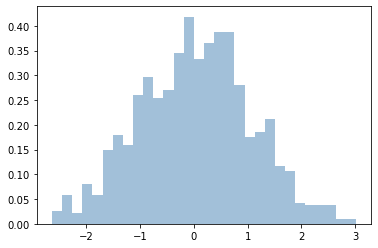

In [3]:
plt.hist(data, bins = 30, density = True, alpha = 0.5,
         histtype = 'stepfilled', color = 'steelblue')

Let's go over each and see what they do:

  - `bins`: Controls the number of bins
  - `density`: Whether we want a frequency or density histogram (look at the y-axis!)
  - `alpha`: Controls transparency (just like in ggplot2)
  - `histtype`: Type of histogram to draw. Default is `"bar"`. Type `"stepfilled"` is a lineplot (for the steps) that is filled. Try `"step"` to see what's going on.
  - `color`: Controls the colour.

### Exercise

Repeat the histogram above but using `histtype = "step"`, `alpha = 1`, and change the colour.

(array([ 20.,  54., 113., 155., 207., 215., 121.,  82.,  22.,  11.]),
 array([-2.64527183, -2.0790192 , -1.51276656, -0.94651392, -0.38026128,
         0.18599135,  0.75224399,  1.31849663,  1.88474927,  2.4510019 ,
         3.01725454]),
 [<matplotlib.patches.Polygon at 0x7f951b307d50>])

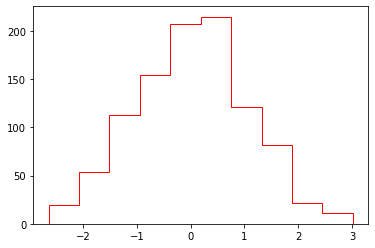

In [4]:
# Write your code here.
plt.hist(data, histtype = "step", alpha = 1, color = "red")


Now let's try with the `olive` dataset. I saved it as a CSV file.

In [5]:
import pandas

olive = pandas.read_csv("olive.csv")
# In R: head(olive)
# In Python: olive.head()
print(olive.head())

           region          area  palmitic  palmitoleic  stearic  oleic  \
0  Southern Italy  North-Apulia     10.75         0.75     2.26  78.23   
1  Southern Italy  North-Apulia     10.88         0.73     2.24  77.09   
2  Southern Italy  North-Apulia      9.11         0.54     2.46  81.13   
3  Southern Italy  North-Apulia      9.66         0.57     2.40  79.52   
4  Southern Italy  North-Apulia     10.51         0.67     2.59  77.71   

   linoleic  linolenic  arachidic  eicosenoic  
0      6.72       0.36       0.60        0.29  
1      7.81       0.31       0.61        0.29  
2      5.49       0.31       0.63        0.29  
3      6.19       0.50       0.78        0.35  
4      6.72       0.50       0.80        0.46  


In [9]:
data_south = olive[olive["region"] == "Southern Italy"]["oleic"]
data_north = olive[olive["region"] == "Northern Italy"]["oleic"]
data_sard = olive[olive["region"] == "Sardinia"]["oleic"]

(array([ 1.,  2.,  6., 11.,  8.,  5.,  1., 16., 25., 23.]),
 array([68.82 , 69.377, 69.934, 70.491, 71.048, 71.605, 72.162, 72.719,
        73.276, 73.833, 74.39 ]),
 <BarContainer object of 10 artists>)

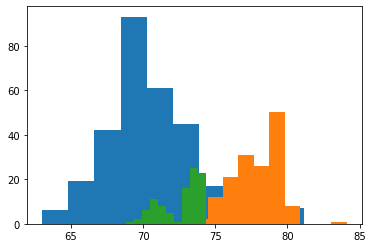

In [10]:
plt.hist(data_south)
plt.hist(data_north)
plt.hist(data_sard)

Note: These are **not** stacked histograms! We're printing each histogram on top of the next.

Now let's customize this further by adding transparency and a legend.

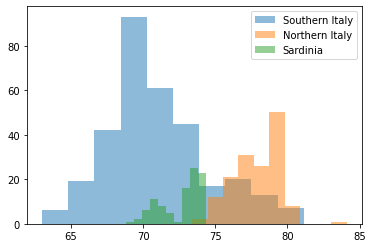

In [13]:
# Add transparency
plt.hist(data_south, alpha = 0.5, label = "Southern Italy")
plt.hist(data_north, alpha = 0.5, label = "Northern Italy")
plt.hist(data_sard, alpha = 0.5, label = "Sardinia")

# Add legend
# Only labeled parts will be added
plt.legend()

## Boxplots

Next, let's discuss boxplots.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f951c8153d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f951c815c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f951c80df50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f951c822550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f951c822990>],
 'means': []}

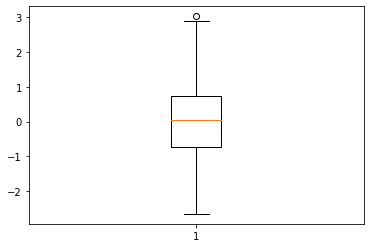

In [14]:
# Single boxplot
plt.boxplot(data)

To create multiple boxplots next to one another, we can pass a list of vectors.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f951c9019d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f951c90a290>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f951c901550>,
 'medians': [<matplotlib.lines.Line2D at 0x7f951c90ab50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f951c90af90>,
 'means': []}

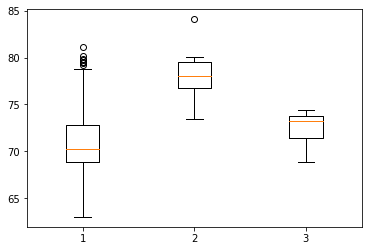

In [15]:
# List with three elements, each a vector of data
olive_box = [data_south, data_north, data_sard]
plt.boxplot(olive_box)

By default, the labels on the x-axis are simply numbers. We can change that using the `labels` argument.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f951ee28a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f951ee36190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f951ee28590>,
 'medians': [<matplotlib.lines.Line2D at 0x7f951ee36a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f951ee36e90>,
 'means': []}

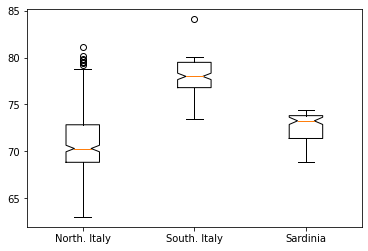

In [20]:
plt.boxplot(olive_box, notch = True,
            labels = ["North. Italy", "South. Italy", "Sardinia"])

### Exercise

One of the parameters to `boxplot` is `notch`. What does it do?

## Barplot

For bar plots, you need to specify two lists:
  - The levels of the categorical variable
  - The counts in each group (or the value we want to display)
  
Recall that in `R` the counts were computed by ggplot; here we have to pass the counts explicitly.

<BarContainer object of 5 artists>

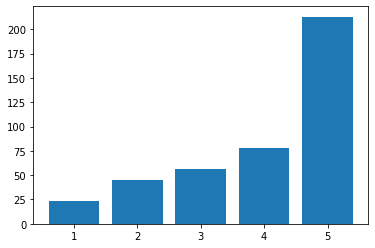

In [21]:
# data: Counts
data = [23, 45, 56, 78, 213]
levels = [1,2,3,4,5]
plt.bar(levels, data)

<BarContainer object of 5 artists>

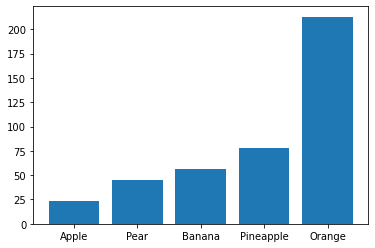

In [22]:
# Levels can also be strings
plt.bar(["Apple","Pear","Banana","Pineapple","Orange"], 
        data)

For more control, we can also create each bar separately (like we did for histograms).

<BarContainer object of 1 artists>

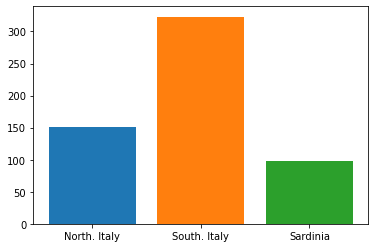

In [23]:
# Beware: the function is len() in Python
#         but length() in R!

plt.bar("North. Italy", len(data_north))
plt.bar("South. Italy", len(data_south))
plt.bar("Sardinia", len(data_sard))

You can also change the colours using one of the built in palettes (for more info: https://matplotlib.org/stable/tutorials/colors/colormaps.html).

In [24]:
# np.linspace is the equivalent of seq in R
# It outputs equidistant values between min=0 and max=1
colours = plt.cm.viridis(np.linspace(0, 1, 3))

# The output is a list of RGBA values
print(colours)

[[0.267004 0.004874 0.329415 1.      ]
 [0.127568 0.566949 0.550556 1.      ]
 [0.993248 0.906157 0.143936 1.      ]]


<BarContainer object of 1 artists>

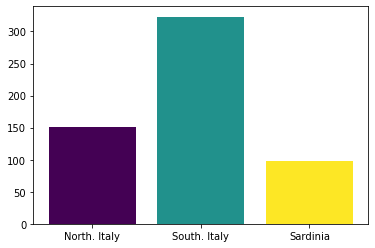

In [25]:
plt.bar("North. Italy", len(data_north), color = colours[0])
plt.bar("South. Italy", len(data_south), color = colours[1])
plt.bar("Sardinia", len(data_sard), color = colours[2])

### Exercise

Create a bar plot with percentages on the y-axis?

<BarContainer object of 1 artists>

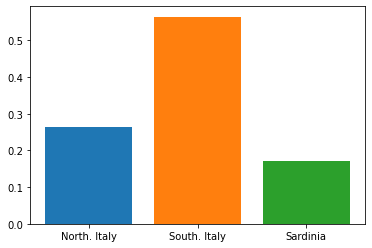

In [26]:
# Write your code here
nrows = olive.shape[0]

plt.bar("North. Italy", len(data_north)/nrows)
plt.bar("South. Italy", len(data_south)/nrows)
plt.bar("Sardinia", len(data_sard)/nrows)

## Scatter plots and line plots

Scatter plots and line plots are actually created using the same function, like in base R. First, we will look at scatter plots.

In [ ]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

plt.plot(x, y, 'o', color='black')

The third argument `"o"` controls how the points look.

In [ ]:
plt.plot(x, y, 'x', color = 'black')

If you prefer a line plot, you can simply omit the third argument altogether.

In [ ]:
plt.plot(x, y, color = 'black')

You can add as many lines as you like. Here is a sample of different ways of specifying the colour.

In [ ]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse')  # all HTML color names supported

Finally, we can use the scatter plot on the olive dataset.

In [ ]:
plt.plot(olive["arachidic"],
         olive["linolenic"], "o")

# Add axis labels
plt.xlabel("Arachidic")
plt.ylabel("Linolenic")